<a href="https://colab.research.google.com/github/aliss153/Aprendizaje-Automatico/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alisson Manosalvas &bull; 14 Dic 2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [30]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import numpy as np  # Operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Visualización
import plotly.express as px # Para visualización interactiva

from sklearn.preprocessing import StandardScaler  # Estandarización de datos

from sklearn.datasets import make_blobs # Creación de datos de prueba
from sklearn.cluster import KMeans  # Algoritmo K-means
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.metrics import silhouette_score

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

**- Muestra algunos datos.**

In [6]:
url_data = "https://raw.githubusercontent.com/aliss153/Aprendizaje-Automatico/main/Country-data.csv"

df = pd.read_csv(url_data)
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**- Muestra una descripción de los datos.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**- Escala los datos si es necesario.**

In [9]:
numeric_cols = df.drop(columns=['country']).columns
numeric_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_values, columns=numeric_cols)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


**- Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.**

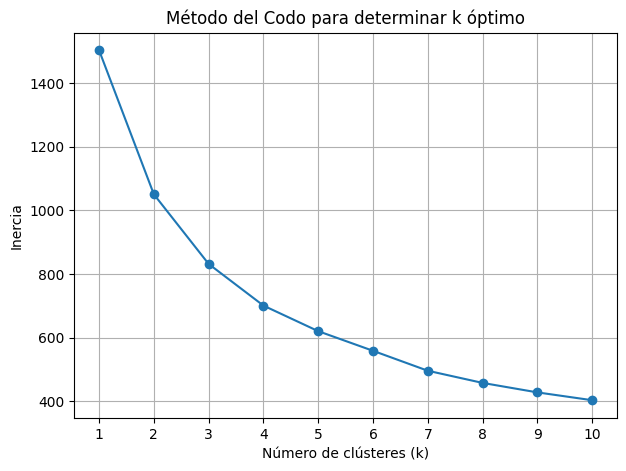

In [13]:
inercia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_values, inercia, marker='o')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para determinar k óptimo")
plt.xticks(k_values)
plt.grid(True)
plt.show()

**- Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.**

El npumero óptimo de clústeres por la gráfca, se puede ver que a inercia tiene una disminución pronunciada hasta **k=5**,después de eso se vuelve más gradual. Es un punto que representa un 'equilibrio' y aumentar más clústeres no aporta de una manera significativa alagrupamiento

**- De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.**

El valor ki=5 porque hasta ese punto la inercia disminuye de manera significativa, a partir de esto, al reducción de la inercia se ve que es mínima por lo que agregar no mejora la calidad

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

**- Asigna los grupos.**

In [14]:
# K = 5
modelo = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = modelo.fit_predict(df_scaled)

df_kmeans = df.copy()
df_kmeans['Cluster'] = ['C' + str(c + 1) for c in labels]

df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,C2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,C1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,C1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,C2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,C1


**- Revisa la media de cada grupo.**

In [16]:
numeric_cols = df_kmeans.drop(columns=['country', 'Cluster']).columns

df_kmeans.groupby('Cluster')[numeric_cols].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
C1,21.614286,40.976060,6.169048,47.518642,12801.071429,7.618857,73.004762,2.277619,6581.809524
C2,90.793617,29.661915,6.462553,43.680851,3870.702128,9.951809,59.212766,4.974043,1900.255319
C3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
C4,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000
C5,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


**- Revisa el mínimo y máximo de cada grupo**

In [18]:
min_por_cluster = df_kmeans.groupby('Cluster')[numeric_cols].min()
min_por_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
C1,4.5,0.109,1.97,0.0659,1990,-4.210,63.0,1.25,592
C2,28.1,2.200,2.20,17.2000,609,0.885,32.1,2.59,231
C3,2.8,153.000,3.96,142.0000,28300,-0.046,80.3,1.15,21100
C4,2.6,12.400,1.81,13.6000,22900,-3.220,73.8,1.23,19800
C5,130.0,25.300,5.07,17.4000,5150,104.000,60.5,5.84,2330


In [19]:
max_por_cluster = df_kmeans.groupby('Cluster')[numeric_cols].max()
max_por_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
C1,64.4,93.8,14.20,108.0,45400,45.90,80.4,4.34,20700
C2,208.0,85.8,13.10,101.0,33700,26.50,71.1,7.49,17100
C3,6.8,200.0,8.65,174.0,91700,3.83,82.7,1.63,105000
C4,13.8,103.0,17.90,86.5,125000,16.70,82.8,3.03,87800
C5,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330


**- Muestra algunos integrantes de cada grupo.**

In [20]:
for c in sorted(df_kmeans['Cluster'].unique()):
    print(f"\nIntegrantes del {c}:")
    display(
        df_kmeans[df_kmeans['Cluster'] == c][['country']].head(5)
    )


Integrantes del C1:


,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia



Integrantes del C2:


,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso



Integrantes del C3:


,country
91,Luxembourg
98,Malta
133,Singapore



Integrantes del C4:


,country
7,Australia
8,Austria
10,Bahamas
15,Belgium
23,Brunei



Integrantes del C5:


,country
113,Nigeria


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

**- C1: Países con desarrollo medio**

Tienen un amortalidad infantil baja, y una esperanza de vida alrededor de 73 años, con un ingreso y PIB  intermedios, países como Albania Algeria, Argentina, Armenia. Este grupo tiene condiciones estables, pero no alcanzan niveles altos de desarrollo económico

**- C2: Países con bajo desarrollo**

Es un grupo con mortalidad infantil alta, y una esperanza de vida bajas, al igual que sus ingresos y PIB son bajos, países como Afghanistan, Angola, Benin. Es un grupo con fuertes limitaciones económicas y sociales

**- C3: Países altamente desarrollados**

Tienen ingresos y PIB muy elevados, la mortalidad infantil es muy baja, y su esperanza de vida también es alta, y tienen estabilidad económica. Este grupo cuenta con altos estándares de vida, economía y salud


**- C4: Países altamente desarrollados**

Tienen ingresos altos, menores que el grupo C3, tienen una buena esperanza de vida, economía estable, y una mortlidad infantil baja. Este grupo representa países con alta calidad de vida pero sin valores extremos como C3

**- C5: Países en situación crítica**

Tienen una inflacción muy elevada,  la mortalidad infantil muy alta, al igual que la tasa de fertilidad y también tiene bajos niveles de ingreso. Este grupo representa a píses con condiciones socioeconómicas y de salud críticas

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['country'] = df_kmeans['country'].values
df_pca['Cluster'] = df_kmeans['Cluster'].values

fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=['country']
)

fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    title='Visualización 2D de los Clústeres (k-Means + PCA)',
    width=800,
    height=600
)
fig.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

**- ¿Qué tan buenos te parecen los grupos?**

Creo que los grupos son razonablemente buenos, porque con esta gráfica se ve una separación clara entre los clústeres extremos, y para con los grupos intermedios, parecen estar sobrepuestos

**- Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?**

In [28]:
pca.explained_variance_ratio_.sum()

np.float64(0.6313336543771411)

Con un 63.13$ de la varianza, el restante, es decir el 36.87%no se encuentra represemtada en el gráico, sin embargo, la visualización sigue siendo útil para identifiacar patrones generales y evaluar la calidad de agrupamiento

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [34]:
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(df_scaled, labels)

df_kmeans['silueta'] = silhouette_vals

df_kmeans.groupby('Cluster')['silueta'].mean()


,silueta
Cluster,
C1,0.315502
C2,0.278356
C3,0.395980
C4,0.287610
C5,0.000000


La métrica de silueta indica que el agrupamiento es de una calidad 'moderada' con clústeres razonablemente sepaprados. Algunos grupos como C3, están mejor defindos, mientras que los grupos intermedios presentan cierto solapamiento